# Pandas!

In [21]:
import pandas as pd
import numpy as np
# if you want to turn off the html output then you can run this line of code
# pd.set_option("display.notebook_repr_html", False)

In [22]:
birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv",comment="#")
flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv",comment="#")
iris = pd.read_csv("http://www.gagolewski.com/resources/data/iris.csv",comment="#")
tips = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv",comment="#")

In [23]:
# we can define a dataframe with a dictionary, where the keys are columns
np.random.seed(123)
x = pd.DataFrame({ # dict
    "A": np.random.rand(5),
    "B": [True, False, True, None, True],
    "C": ["f", None, "m", "f", "m"]
})
print(x)
print(type(x))

          A      B     C
0  0.696469   True     f
1  0.286139  False  None
2  0.226851   True     m
3  0.551315   None     f
4  0.719469   True     m
<class 'pandas.core.frame.DataFrame'>


In [24]:
# print first few rows
print(tips.head())
# print last few rows
print(tips.tail())
# we can find the shape of a dataframe
print(tips.shape)
# we can print datatype of each column
print(tips.dtypes)
# we can find out info of our dataframe
print(tips.info)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2
(244, 7)
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object
<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         1

In [33]:
y = pd.Series([1,2,3,4])

# if you want to extract a column from a dataframe, you can use loc as the best option!
print(x.loc[:,"A"])
# but you can also just do this, but it's not always great, we'll find out more
print(x["A"])
# you can also use the . character. but we need to be careful as if you have a column called 'sum', you can't call it obvs
print(x.A)
print(x.sum)
# we can then pull the values into a numpy array for example
print(x['A'].values)
# or ask for the dtype of that column
print(x['A'].dtype)

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64
0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64
0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: A, dtype: float64
<bound method DataFrame.sum of           A      B     C
0  0.696469   True     f
1  0.286139  False  None
2  0.226851   True     m
3  0.551315   None     f
4  0.719469   True     m>
[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
float64


In [39]:
# we could pull out a column of the dataframe and make it a vector
u = x['A'].copy()
# and then we can rename it, and this means when we put it back in the dataframe, this will be the column name
u.name = 'Hello'
print(u)
print(pd.DataFrame(u))

0    0.696469
1    0.286139
2    0.226851
3    0.551315
4    0.719469
Name: Hello, dtype: float64
      Hello
0  0.696469
1  0.286139
2  0.226851
3  0.551315
4  0.719469


# Datetime

In [65]:
# Datetime is something tricky you work with
# date_range is a good way to make date ranges, and makes a new datetime format
# it will round up to start a week on Sunday
dates = pd.Series(pd.date_range("2018-10-13",periods=5,freq='w'))
print(dates)

birth_dates = pd.read_csv("http://www.gagolewski.com/resources/data/birth_dates.csv",comment="#")
# let's convert the BirthDate column to a date_time datatype
# remember to put dayfirst = True, to be sure that all dates are converted properly
print(birth_dates['BirthDate'].dtype)
print(birth_dates.head())
birth_dates['BirthDate'] = pd.to_datetime(birth_dates.BirthDate,dayfirst=True)
print(birth_dates['BirthDate'].dtype)
print(birth_dates.head())

0   2018-10-14
1   2018-10-21
2   2018-10-28
3   2018-11-04
4   2018-11-11
dtype: datetime64[ns]
object
               Name   BirthDate
0    Hung Hyun-Seok  12.06.2000
1  Benno Blumenthal  31.12.1918
2  Paitoon Ornwimol  26.06.1958
3    P'yon Yong-Sun  10.07.1947
4    Étienne Chaney  04.09.1983
datetime64[ns]
               Name  BirthDate
0    Hung Hyun-Seok 2000-06-12
1  Benno Blumenthal 1918-12-31
2  Paitoon Ornwimol 1958-06-26
3    P'yon Yong-Sun 1947-07-10
4    Étienne Chaney 1983-09-04


# Categorical data

In [70]:
print(np.unique(iris["Species"]))
# we can tell pandas to interpret a column as a categorical datatype. Dtype = category!
# we're going to randomly sample some of the data in this column
iris["Species"].astype("category").sample(n=5,random_state=123)

# categories are good to work with because they're represented as intergers and not strings
# this is great because then we're close to one-hot encoding categories!
y = iris["Species"].astype("category")
print(y.cat.codes.sample(n=5,random_state=123))

['setosa' 'versicolor' 'virginica']
72     1
112    2
132    2
88     1
37     0
dtype: int8


# Row & Column Indexes

In [80]:
# indexes - a dataframe has 2, series has 1
# we can assign each row with a label if we want
print(x.index)
# and then we can see the index of columns:
print(x.columns)

# we may have dataframes where the row index isn't sequential
print(iris.sample(n=5,random_state=123))
print(iris.sample(n=5,random_state=123).index)

# we can go ahead and reset the index, but it prints the index as a new column, so if we don't want it, we call drop=True
print(iris.sample(n=5,random_state=123).reset_index())
print(iris.sample(n=5,random_state=123).reset_index(drop=True))

RangeIndex(start=0, stop=5, step=1)
Index(['A', 'B', 'C'], dtype='object')
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
72            6.3          2.5           4.9          1.5  versicolor
112           6.8          3.0           5.5          2.1   virginica
132           6.4          2.8           5.6          2.2   virginica
88            5.6          3.0           4.1          1.3  versicolor
37            4.9          3.6           1.4          0.1      setosa
Int64Index([72, 112, 132, 88, 37], dtype='int64')
   index  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0     72           6.3          2.5           4.9          1.5  versicolor
1    112           6.8          3.0           5.5          2.1   virginica
2    132           6.4          2.8           5.6          2.2   virginica
3     88           5.6          3.0           4.1          1.3  versicolor
4     37           4.9          3.6           1.4          0.1      setosa
   Se

In [83]:
# we want to be able to rename something on the fly, because we're going to lots of manipulation to a column in one go, and you don't want it to be destructive
# so we can use the rename method
print(iris.sample(n=5,random_state=123).rename({"Species":"Hello"},axis=1))

# if we want to pull a sample of dataset and make it a new DataFrame and restart the index:
print(iris.sample(n=5,random_state=123)['Species'].reset_index(name='New_Col'))

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width       Hello
72            6.3          2.5           4.9          1.5  versicolor
112           6.8          3.0           5.5          2.1   virginica
132           6.4          2.8           5.6          2.2   virginica
88            5.6          3.0           4.1          1.3  versicolor
37            4.9          3.6           1.4          0.1      setosa
   index     New_Col
0     72  versicolor
1    112   virginica
2    132   virginica
3     88  versicolor
4     37      setosa


In [84]:
# we can also rename the row_index and column_index if we like
x.index.name = "Rows"
x.columns.name = "Columns"
print(x)

Columns         A      B     C
Rows                          
0        0.696469   True     f
1        0.286139  False  None
2        0.226851   True     m
3        0.551315   None     f
4        0.719469   True     m


In [87]:
# we can set our index to something whatever we want as well!
print(x.set_index("A"))
print(x.set_index("B"))

Columns       B     C
A                    
0.696469   True     f
0.286139  False  None
0.226851   True     m
0.551315   None     f
0.719469   True     m
Columns         A     C
B                      
True     0.696469     f
False    0.286139  None
True     0.226851     m
NaN      0.551315     f
True     0.719469     m


In [97]:
# we can set the index to consist of a number of columns if we want!
# this is a heirachical index
print(flights.set_index(["year","month"]).head())

# we need to be aware of this because some functions will return a heirachical index, like an excel pivot table
print(tips.groupby(['sex','smoker']).tip.mean())
# we can reset the index of these outputs to get rid of the heirachical index
print(tips.groupby(['sex','smoker']).tip.mean().reset_index())

               passengers
year month               
1949 January          112
     February         118
     March            132
     April            129
     May              121
sex     smoker
Female  No        2.773519
        Yes       2.931515
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64
      sex smoker       tip
0  Female     No  2.773519
1  Female    Yes  2.931515
2    Male     No  3.113402
3    Male    Yes  3.051167


# Test what we've learned so far

In [164]:
flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv",comment="#")

# let's set the index of the passengers dataframe to be of date_time type
print(flights.head())

# my solution didn't really work!
flights['year'] = pd.to_datetime(flights['year'],dayfirst=True)
print(flights.head())
y = flights['month'].astype('category',ordered=False)
y[:12]

flights = pd.read_csv("http://www.gagolewski.com/resources/data/flights.csv",comment="#")
# this is Marek's solution. you can't call to_datetime on just a month name, but you can if it's month and year
flights.index = pd.to_datetime(flights["month"] + " " + flights["year"].astype('str'))
print(flights.head())

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121
                           year     month  passengers
0 1970-01-01 00:00:00.000001949   January         112
1 1970-01-01 00:00:00.000001949  February         118
2 1970-01-01 00:00:00.000001949     March         132
3 1970-01-01 00:00:00.000001949     April         129
4 1970-01-01 00:00:00.000001949       May         121
            year     month  passengers
1949-01-01  1949   January         112
1949-02-01  1949  February         118
1949-03-01  1949     March         132
1949-04-01  1949     April         129
1949-05-01  1949       May         121


/Users/garethjones/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  if __name__ == '__main__':


# Indexing

In [165]:
np.random.seed(123)
b = pd.Series(np.round(np.random.uniform(0,1,10),2))
c = b.copy()
c.index = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
b.index = np.random.permutation(np.r_[0:10])

In [193]:
# don't apply a square brackets operator on a Series to find the index number, because it works based on the label!
print(b)
# we would expect this to be first position, but it's the 0 label. hence as we saw earlier, don't do this!
print(b[0])
# instead, we should using iloc
print(b.iloc[0])


# the reason loc is good is when you have column names, you can select a slice using it
print(tips.loc[:,"tip":"smoker"].head())
# this is the same as looking for the label, but means we can use labels to slice
print(b.loc[0])
# we can use loc to do string slice for example
print(c.loc["c":"f"])

# we can do a conditional boolean type slice using loc also
print(c.loc[c>0.7])

# we can use loc on a heirachical index. the result here is that the sub-index becomes the new dominant index
x = tips.groupby(["sex","day"]).mean()
print(x)
print(x.loc["Male",:])

# we can also do something similar using slice(None), that selects all rows
print(x.loc[(slice(None,"Fri")),:])

2    0.70
1    0.29
8    0.23
7    0.55
9    0.72
4    0.42
5    0.98
6    0.68
3    0.48
0    0.39
dtype: float64
0.39
0.7
    tip     sex smoker
0  1.01  Female     No
1  1.66    Male     No
2  3.50    Male     No
3  3.31    Male     No
4  3.61  Female     No
0.39
c    0.23
d    0.55
e    0.72
f    0.42
dtype: float64
e    0.72
g    0.98
dtype: float64
             total_bill       tip      size
sex    day                                 
Female Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.872222  3.367222  2.944444
       Thur   16.715312  2.575625  2.468750
Male   Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
       Thur   18.714667  2.980333  2.433333
      total_bill       tip      size
day                                 
Fri    19.857000  2.693000  2.100000
Sat    20.802542  3.083898  2.644068
Sun    21.887241  3.220345  2.810345
Thur   18.714667  

In [244]:
# My solution

tips = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv",comment="#")

# 1. get data on male customers only
# 2. choose male customers with total bill in $10-20
# 3. choose Sat and Sun with tip > $5
# 4. partition(split) tips: create 2 df: tips_train (80%) and tips_test (20% rows)

# 1.
male_custs = tips.where(tips['sex'] == 'Male').dropna()
print(male_custs.head())

# 2. 
male_bill = male_custs.where(male_custs['total_bill'].between(10,20)).dropna()
print(male_bill.head())

# 3.
day_tip5 = tips[(tips['day'] == 'Sun') | (tips['day'] == 'Sat')] 
day_tip5 = day_tip5.where(day_tip5['tip'] > 5).dropna()
print(day_tip5.head())

# 4.
index_split = len(tips.index)*0.8
tips = tips.reset_index()
tips_train = tips.where(tips['index'] < index_split).dropna().drop('index',axis=1)
tips_test = tips.where(tips['index'] >= index_split).dropna().drop('index',axis=1)

   total_bill   tip   sex smoker  day    time  size
1       10.34  1.66  Male     No  Sun  Dinner   3.0
2       21.01  3.50  Male     No  Sun  Dinner   3.0
3       23.68  3.31  Male     No  Sun  Dinner   2.0
5       25.29  4.71  Male     No  Sun  Dinner   4.0
6        8.77  2.00  Male     No  Sun  Dinner   2.0
    total_bill   tip   sex smoker  day    time  size
1        10.34  1.66  Male     No  Sun  Dinner   3.0
8        15.04  1.96  Male     No  Sun  Dinner   2.0
9        14.78  3.23  Male     No  Sun  Dinner   2.0
10       10.27  1.71  Male     No  Sun  Dinner   2.0
12       15.42  1.57  Male     No  Sun  Dinner   2.0
    total_bill   tip     sex smoker  day    time  size
23       39.42  7.58    Male     No  Sat  Dinner   4.0
44       30.40  5.60    Male     No  Sun  Dinner   4.0
47       32.40  6.00    Male     No  Sun  Dinner   4.0
52       34.81  5.20  Female     No  Sun  Dinner   4.0
59       48.27  6.73    Male     No  Sat  Dinner   4.0


In [250]:
tips = pd.read_csv("http://www.gagolewski.com/resources/data/tips.csv",comment="#")

# Marek's solution
# 1. 
print(tips.loc[tips['sex'] == 'Male',:].head())
# or this is another way, where the query function does everything for us
print(tips.query("sex=='Male'").head())

# 2. 
print(tips.loc[(tips.sex=='Male') & (tips.total_bill.between(10,20)),:].head())
# or
print(tips.query("sex=='Male' and 10 <= total_bill <= 20").head())

# 3. 
print(tips.loc[((tips.day=='Sat') | (tips.day=='Sun')) & (tips.tip > 5)].head())
print(tips.query( "tip > 5 and day in ['Sat','Sun']" ).head())

# 4.
# create random list of permutations of our indexes
idx = np.random.permutation(np.arange(tips.shape[0]))
list1 = idx[:int(tips.shape[0]*0.8)] # select up until the 80th %
list2 = idx[int(tips.shape[0]*0.8):] # select beyond the 80th %
tips_train = tips.iloc[list1,:] # select all columns of dataframe where rows are in list1
tips_test = tips.iloc[list2,:]  # select all columns of dataframe where rows are in list2
print(tips_train.shape)
print(tips_test.shape)

   total_bill   tip   sex smoker  day    time  size
1       10.34  1.66  Male     No  Sun  Dinner     3
2       21.01  3.50  Male     No  Sun  Dinner     3
3       23.68  3.31  Male     No  Sun  Dinner     2
5       25.29  4.71  Male     No  Sun  Dinner     4
6        8.77  2.00  Male     No  Sun  Dinner     2
   total_bill   tip   sex smoker  day    time  size
1       10.34  1.66  Male     No  Sun  Dinner     3
2       21.01  3.50  Male     No  Sun  Dinner     3
3       23.68  3.31  Male     No  Sun  Dinner     2
5       25.29  4.71  Male     No  Sun  Dinner     4
6        8.77  2.00  Male     No  Sun  Dinner     2
    total_bill   tip   sex smoker  day    time  size
1        10.34  1.66  Male     No  Sun  Dinner     3
8        15.04  1.96  Male     No  Sun  Dinner     2
9        14.78  3.23  Male     No  Sun  Dinner     2
10       10.27  1.71  Male     No  Sun  Dinner     2
12       15.42  1.57  Male     No  Sun  Dinner     2
    total_bill   tip   sex smoker  day    time  size
1    

# Practicing with pandas

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
weather = pd.read_csv("http://www.gagolewski.com/resources/data/nycflights13_weather.csv.gz",comment="#")
vehicles = pd.read_csv('http://www.gagolewski.com/resources/data/fueleconomy_vehicles.csv.gz',comment='#')

### Vehicles Dataset

In [61]:
# 1. Convert the values in `cty` (city-fuel-economy) and `hwy` (highway-fuel economy) (given in mpg) to l/100 km. 
# miles = 1.6*km
# litres = gallon / 3.785

vehicles["cty2"] = np.round((1/(vehicles["cty"]*1.6/3.785)*100),2)
vehicles["hwy2"] = np.round(1/(vehicles["hwy"]*1.6/3.785)*100,2)

# 2. Add new columns z_cty and z_hwy, that give z-scores of cty and hwy (i.e., standardize these columns)
# standardizing is taking away means (mean-centring), and dividing by stds
vehicles["z_cty"] = (vehicles.loc[:,"cty2"] - vehicles.loc[:,"cty2"].mean())/vehicles.loc[:,"cty2"].std()
vehicles["z_hwy"] = (vehicles.loc[:,"hwy2"] - vehicles.loc[:,"hwy2"].mean())/vehicles.loc[:,"hwy2"].std()

# 3. Add two other columns z_cty_rel and z_hwy_rel, which denote the corresponding z-scores relative to (grouped by) class.
# group by class
veh_class = vehicles.groupby("class") 

# NEED TO UNDERSTAND THESE LINES
vehicles["z_cty_rel"] = vehicles.groupby("class")[["cty2"]].transform(lambda x: (x-x.mean())/x.std())
vehicles[["cty3", "hwy3"]] = vehicles.groupby("class")[["cty2","hwy2"]].transform(lambda x: (x-x.mean())/x.std())

vehicles.head()

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty,cty2,hwy2,z_cty,z_hwy,z_cty_rel,cty3,hwy3
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18,13.14,13.92,-0.366118,1.168190,-0.743469,-0.743469,0.549798
1,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18,13.14,13.92,-0.366118,1.168190,-0.743469,-0.743469,0.549798
2,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13,18.20,18.20,1.020899,2.720581,0.801694,0.801694,1.966331
3,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13,18.20,18.20,1.020899,2.720581,0.801694,0.801694,1.966331
4,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4.0,2.5,Regular,17,16,14.79,13.92,0.086170,1.168190,-0.239612,-0.239612,0.549798


### Airport Weather Dataset

In [ ]:
# 1. Convert temperature to Celsius.
weather['temp_c'] = (weather['temp']-32)*(5/9)
print(weather.head())

# 2. Compute daily mean temperatures for the JFK airport. 
weather_jfk = weather.query("origin == 'JFK'").groupby(['year','month','day'])['temp_c'].mean().reset_index()
print(weather_jfk.head())

In [46]:
# 3. linearly interpoloate where there is missing hourly temperature data in the dataset

# begin by selecting time and temp columns from JFK specific dataset, and create new index
weather_jfk = weather.query("origin == 'JFK'").loc[:,['year','month','day','hour','temp_c']].reset_index(drop=True)

# we can turn this subset into a single datetime column
weather_jfk_dt = pd.to_datetime(weather_jfk.loc[:,['year','month','day','hour']])

# create a series of date_times for one year with hourly frequency
all_hours = pd.date_range('2013-01-01 00:00:00',periods=365*24,freq='H')

# from our all_hours series, select just those that are not in the weather_jfk datetime column
# creates boolean vector showing True or False for all hours, False being they're not in our weather_jfk data
all_hours.isin(weather_jfk_dt)
missing_hours = all_hours[~all_hours.isin(weather_jfk_dt)] # ~ is the not operator here

# we can make these missing dates into a data-frame, calling each component of the date_time data into a new col
missing_hours = pd.DataFrame({
    "year": difference.year,
    "month": difference.month,
    "day": difference.day,
    "hour": difference.hour,
    "temp_c": np.nan
})

# now append these to our original date and temp weather jfk dataset using concat axis=1
weather_jfk_new = pd.concat((weather_jfk,missing_hours),axis=0)
weather_jfk_new = weather_jfk_new.sort_values(['year','month','day','hour']).reset_index(drop=True)

# we can linearly interpolate data using the interpolate function in pandas
weather_jfk_new["temp_c"] = weather_jfk2["temp_c"].interpolate()
weather_jfk_new.head()

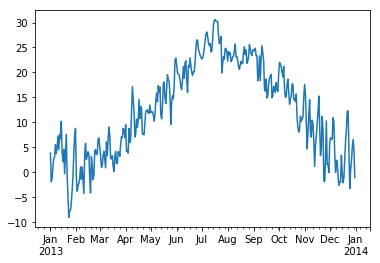

In [51]:
# 3. Present the daily mean temperatures on a plot. The x-axis labels should be human-readable and intuitive.

# calculate mean daily temperatures
weather_jfk_mean = weather_jfk_new.groupby(["year","month","day"])["temp_c"].mean().reset_index()

# to make plotting easier, we can set the index to be a datetime format, so this becomes our x axis automatically
weather_jfk_mean.index = pd.to_datetime(weather_jfk_mean.loc[:,["year","month","day"]])

# now just plot the temperatures, using pandas in-built plot function for dataframes
weather_jfk_mean["temp_c"].plot()

In [54]:
# 4. Choose days with greater mean temperature than in the preceding day.
# if we call the diff method, we're only interested in the positive values, as they will be higher than preceding day
# create list of daily temperature differences
temp_diffs = weather_jfk["temp_c"].diff()
# only select those rows that correspond to temp_diffs > 0
print(weather_jfk.loc[temp_diffs>0,:].head())

    year  month  day  hour  temp_c
2   2013      1    1     2     3.9
7   2013      1    1     8     4.4
11  2013      1    1    12     3.9
12  2013      1    1    13     4.4
14  2013      1    1    15     5.0


In [55]:
# 5. Find 5 hottest days.
print(weather_jfk.sort_values(['temp_c'],ascending=False).head(5))
# alternatively we can do this:
print(weather_jfk.nlargest(5,["temp_c"]))

      year  month  day  hour  temp_c
4763  2013      7   18    16    36.7
4762  2013      7   18    15    36.1
4765  2013      7   18    18    36.1
4764  2013      7   18    17    35.6
4761  2013      7   18    14    35.6
      year  month  day  hour  temp_c
4763  2013      7   18    16    36.7
4762  2013      7   18    15    36.1
4765  2013      7   18    18    36.1
4717  2013      7   16    18    35.6
4761  2013      7   18    14    35.6
